In [ ]:
import pandas as pd

# PROBLEM STATEMENT

# Identify which of these variables significantly influence Job Satisfaction

# Develop a mathematical regression model

# Interpret the model using hypothesis testing

# Check model diagnostics to assess validity



# Hypothesis (for each predictor):
# H₀: The variable has no impact on Job Satisfaction

# H₁: The variable has a significant impact




In [ ]:

df = pd.read_excel('/content/5. Predict Job Satisfaction.xlsx')


In [ ]:
print(df.head())

   Job Satisfaction  Relationship with Supervisor  \
0                55                             3   
1                20                             1   
2                85                             4   
3                65                             4   
4                45                             3   

   Overall Quality of Work Environment  Total Hours Worked per Week  \
0                                    6                           55   
1                                    1                           60   
2                                    8                           45   
3                                    5                           65   
4                                    4                           40   

   Opportuniites for Advancement  
0                              4  
1                              3  
2                              1  
3                              5  
4                              3  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Job Satisfaction                     20 non-null     int64
 1   Relationship with Supervisor         20 non-null     int64
 2   Overall Quality of Work Environment  20 non-null     int64
 3   Total Hours Worked per Week          20 non-null     int64
 4   Opportuniites for Advancement        20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes
None


In [ ]:
df.describe()

,Job Satisfaction,Relationship with Supervisor,Overall Quality of Work Environment,Total Hours Worked per Week,Opportuniites for Advancement
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,62.000000,3.250000,5.900000,52.500000,3.100000
std,22.618111,1.118034,2.468752,10.323708,1.372665
min,10.000000,1.000000,1.000000,40.000000,1.000000
25%,48.750000,3.000000,4.750000,45.000000,2.000000
50%,65.000000,3.000000,6.500000,52.500000,3.000000
75%,76.250000,4.000000,8.000000,60.000000,4.000000
max,95.000000,5.000000,10.000000,75.000000,5.000000


In [ ]:
print(df.isnull().sum())

Job Satisfaction                       0
Relationship with Supervisor           0
Overall Quality of Work Environment    0
Total Hours Worked per Week            0
Opportuniites for Advancement          0
dtype: int64


# NO NULL VALUES

In [ ]:
print(df.duplicated().sum())

0


#NO DUPLICATES

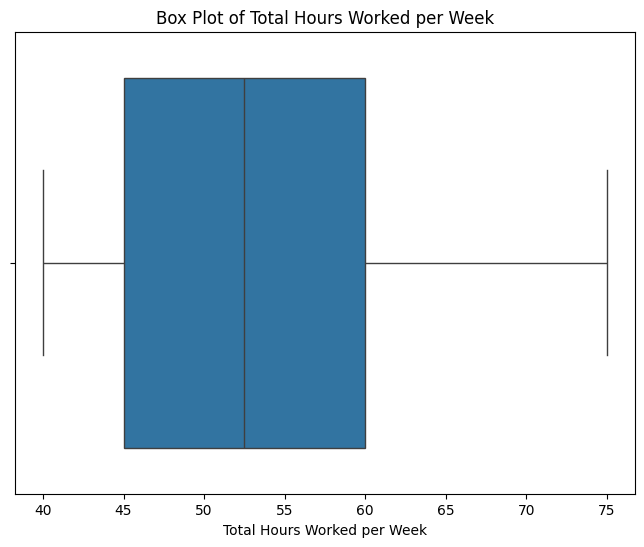

In [ ]:
# prompt: CHECK OUTLIERS FOR Total Hours Worked per Week USING BOX PLOT

import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total Hours Worked per Week'])
plt.title('Box Plot of Total Hours Worked per Week')
plt.show()


# THERE ARE NO OUTLIERS IN Total Hours Worked per Week COLUMN (Quantitative) AND AS OTHER COLUMNS ARE ORDINAL CATEGORIES SO CHECKING OUTLIER FOR THEM WILL BE MEANINGLESS

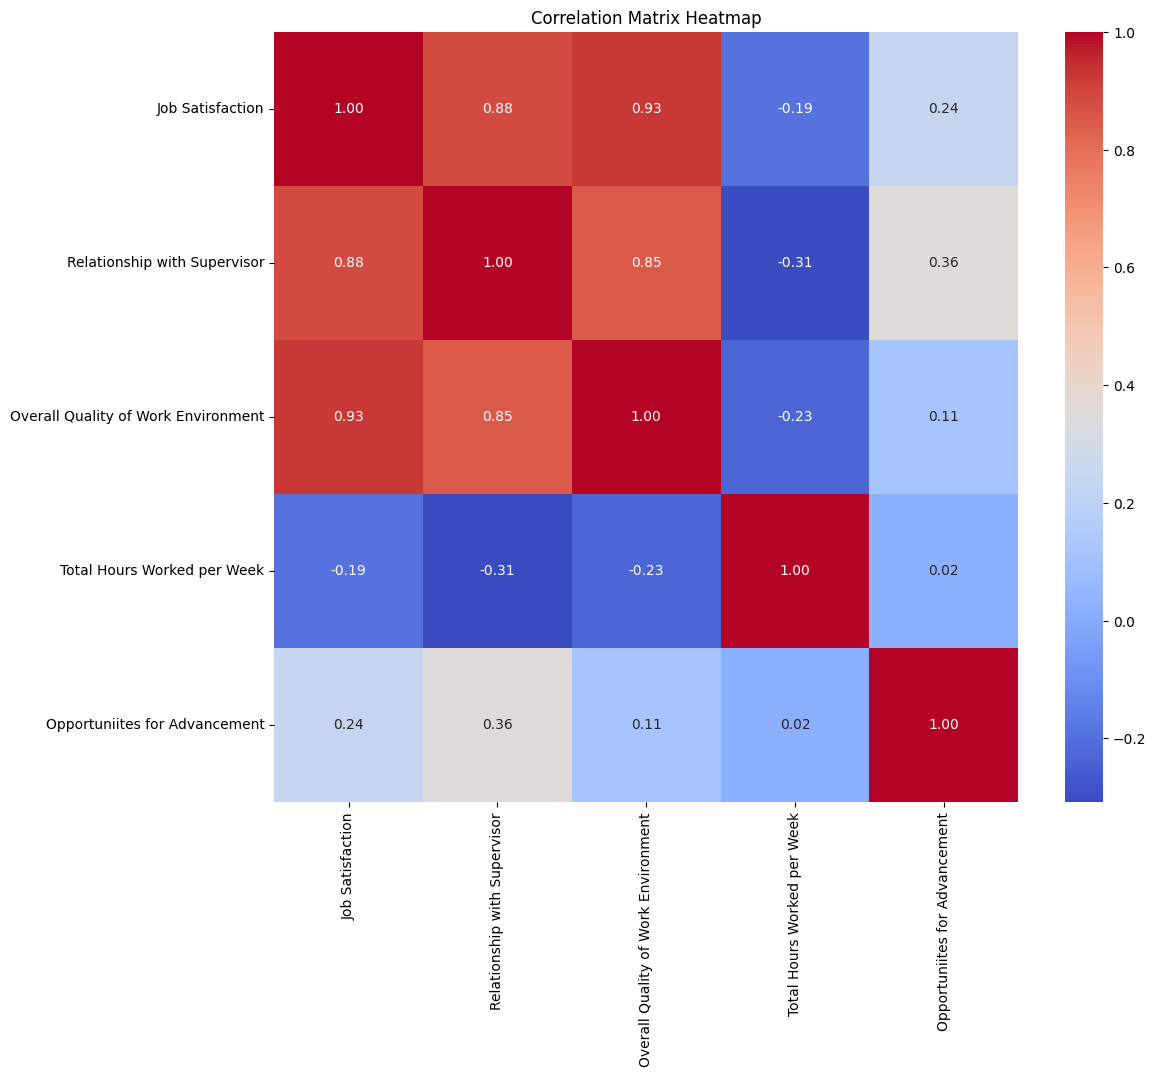

In [ ]:
# prompt: Generate Correlation Matrix using heat map

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# Top Predictors of Job Satisfaction:

# Work Environment (0.93) is the most critical factor.

# Relationship with Supervisor (0.88) is also extremely important.

# Total Hours Worked per Week has a slight negative effect, but not a major one.

# Opportunities for Advancement have a small positive effect, meaning they matter but aren’t as impactful as daily environment or management relationships.



In [ ]:
# Set 'Job Satisfaction' as the dependent variable (y)
y = df['Job Satisfaction']

# Define independent variables (X) - all columns except 'Job Satisfaction'
X = df.drop('Job Satisfaction', axis=1)




In [ ]:
X

,Relationship with Supervisor,Overall Quality of Work Environment,Total Hours Worked per Week,Opportuniites for Advancement
0,3,6,55,4
1,1,1,60,3
2,4,8,45,1
3,4,5,65,5
4,3,4,40,3
5,4,6,50,4
6,2,2,75,2
7,4,7,40,3
8,5,8,45,5
9,3,7,60,1


In [ ]:
y

,Job Satisfaction
0,55
1,20
2,85
3,65
4,45
5,70
6,35
7,60
8,95
9,65


In [ ]:
# prompt: Perform multiple linear regression using stats model

import statsmodels.api as sm

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Job Satisfaction   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     33.61
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           2.52e-07
Time:                        11:45:19   Log-Likelihood:                -67.253
No. Observations:                  20   AIC:                             144.5
Df Residuals:                      15   BIC:                             149.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
# prompt: VIF

import pandas as pd
# Assuming you have already run the provided code and have the 'model' object.

# Access the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


,feature,VIF
0,const,51.851185
1,Relationship with Supervisor,5.215179
2,Overall Quality of Work Environment,4.302989
3,Total Hours Worked per Week,1.150273
4,Opportuniites for Advancement,1.407817


# No column needs to be removed right now, because:

# The highest VIF is 5.22

# All features are meaningful and interpretable for predicting Job Satisfaction as :
# VIF < 5 → Acceptable

# VIF > 5 → Potential multicollinearity concern

# VIF > 10 → Serious concern (consider dropping)

In [ ]:
# prompt: Perform step by step regression and remove insignificant columns having p-value greater than 0.05

import pandas as pd
import statsmodels.api as sm

def stepwise_regression(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# Assuming 'X' and 'y' are defined as in the previous code
X = df.drop('Job Satisfaction', axis=1)
y = df['Job Satisfaction']

# Perform stepwise regression
selected_features = stepwise_regression(X, y)

# Print the selected features
print("Selected features:", selected_features)

# Fit the final model with the selected features
final_X = X[selected_features]
final_X = sm.add_constant(final_X)
final_model = sm.OLS(y, final_X).fit()
print(final_model.summary())


Add  Overall Quality of Work Environment with p-value 4.03816e-09
Add  Relationship with Supervisor   with p-value 0.0319401
Selected features: ['Overall Quality of Work Environment', 'Relationship with Supervisor']
                            OLS Regression Results                            
Dep. Variable:       Job Satisfaction   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     71.85
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           5.10e-09
Time:                        11:51:53   Log-Likelihood:                -67.777
No. Observations:                  20   AIC:                             141.6
Df Residuals:                      17   BIC:                             144.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                    

# R-squared	= **0.894** (Model explains 89.4% of the variation in Job Satisfaction which is **high**)

# The model shows that **Work Environment and Relationship with Supervisor** are both significant predictors of job satisfaction.

#**Regression Equation**
# Job Satisfaction = 4.39 + 5.79 * (Overall Quality of Work Environment) + 7.05 * (Relationship with Supervisor)


# Interpretation:
# A 1-point improvement in work environment boosts job satisfaction by 5.79 points

# A 1-point improvement in supervisor relationship increases it by 7.05 points

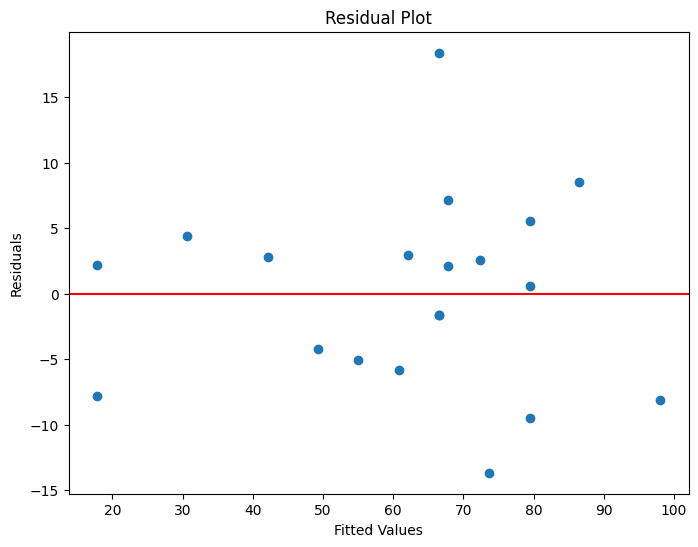

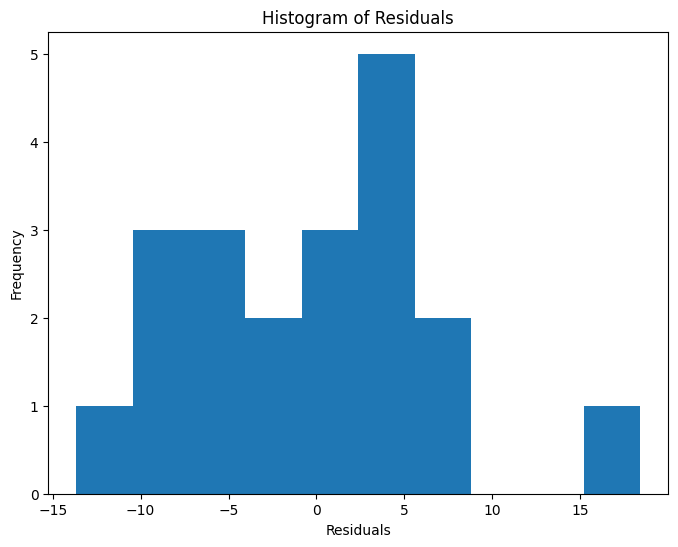

In [ ]:
# prompt: Residual Analysis

# Assuming you have the 'final_model' from the previous code

import matplotlib.pyplot as plt

# Get the residuals
residuals = final_model.resid

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(final_model.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.show()

# Check for normality of residuals using a histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10) # Adjust bins as needed
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()




# 1. **Residual Plot:** The residuals are randomly scattered around zero, which suggests that the assumptions of linearity and homoscedasticity (equal variance) are reasonably met.

# 2. **Histogram of Residuals:** The residuals are roughly symmetric but slightly skewed, indicating an approximate normal distribution.